In [1]:
from ast import literal_eval  
import math   
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

from collections import defaultdict
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection   

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

# Comparison of feature selected datasets: `clinical`, `clinical+T1`, `T1`

In [2]:
def evaluate_fi(df_importances):
    df_importances_sf = df_importances.copy()  
    df_importances_sf["n"] = np.sum(df_importances_sf.iloc[:,1:-1] > 0, axis = 1) 
    N = len(df_importances_sf.columns) - 3
    df_importances_sf["importance"] = df_importances_sf["n"]/N    
    return df_importances_sf

In [3]:
# model = "rfc"
# df_fi = pd.DataFrame()


# ''' Clincial ''' 
# df = pd.read_csv(f"../../clinical/results/prediction/featureSelection/12_uponAdmission/boruta/modelComparison/zigaPipeline/importances_test_{model}.csv") 
# df = evaluate_fi(df)
# df["varSet"] = "clinical"
# df_fi = pd.concat([df_fi, df], axis=0)


# ''' Clincial + T1 ''' 
# df = pd.read_csv(f"../../clinical_T1/results/prediction/featureSelection/12_uponAdmission/boruta+bestSterols/modelComparison/zigaPipeline/importances_test_{model}.csv") 
# df = evaluate_fi(df)
# df["varSet"] = "clinical+T1"
# df_fi = pd.concat([df_fi, df], axis=0)

# ''' T1 ''' 
# df = pd.read_csv(f"../../T1/results/prediction/featureSelection/12_sterol_discoveryValidation/boruta/modelComparison/zigaPipeline/importances_test_{model}.csv") 
# df = evaluate_fi(df)
# df["varSet"] = "T1"
# df_fi = pd.concat([df_fi, df], axis=0)

In [6]:
df_fi = pd.DataFrame()

bestModels = {"T1":"rfc", 
                "clinical":"gnb",
              "clinical_T1":"rfc"}

for dataset, model in bestModels.items():
    if dataset == "T1": 
        timepoint = "12_sterol_discoveryValidation_corrected" 
        fs = "iterativeBoruta"
    else: timepoint = "12_uponAdmission"
    if dataset == "clinical_T1":
        fs = "clinical+bestSterols"
    if dataset == "clinical": 
        fs = "boruta"

    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/importances_test_{model}.csv") 
    df = evaluate_fi(df)
    df["varSet"] = dataset
    df_fi = pd.concat([df_fi, df], axis=0)

In [7]:
df_fi

,feature,importance_0,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,...,importance_94,importance_95,importance_96,importance_97,importance_98,importance_99,model,n,importance,varSet
0,2425-dihydrolanosterol,0.083960,0.079123,0.069123,0.086541,0.084712,0.083960,0.083960,0.072456,0.075038,...,0.076541,0.092882,0.088797,0.092130,0.083960,0.079123,rfc,100,1.00,T1
1,zymostenol,0.007519,0.010852,0.003434,0.007845,0.012356,0.010100,0.013434,0.024937,0.011604,...,0.009023,0.017519,-0.002481,0.021178,0.020100,0.009348,rfc,96,0.96,T1
2,desmosterol,0.091053,0.086541,0.096967,0.093634,0.073534,0.090627,0.111053,0.089123,0.094286,...,0.105464,0.088797,0.074286,0.089875,0.097293,0.096967,rfc,100,1.00,T1
3,24-dehydrolathosterol,0.013333,0.016667,0.013333,0.016667,0.016667,0.013333,0.010000,0.023333,0.013333,...,0.013333,0.006667,0.013333,0.006667,0.010000,0.010000,rfc,98,0.98,T1
4,2425-dihydrolanosterol,0.111378,0.119549,0.111378,0.109875,0.115038,0.098371,0.114712,0.120627,0.099875,...,0.109123,0.117293,0.112456,0.115464,0.108797,0.105789,rfc,100,1.00,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,crp_admission_mg/L,0.016032,0.016032,0.007643,0.016032,0.000746,0.005687,0.015286,0.005687,0.005687,...,0.001493,0.012584,0.010628,0.004941,0.009882,0.008389,rfc,93,0.93,clinical_T1
1964,2425-dihydrolanosterol,0.002239,0.001493,0.000000,-0.001209,-0.004658,-0.008106,0.000000,-0.008106,0.005224,...,-0.003911,0.000283,0.000746,-0.004658,0.005224,-0.000463,rfc,55,0.55,clinical_T1
1965,zymostenol,0.012867,0.012120,0.010911,0.002239,0.013613,0.012120,0.016315,0.009418,0.014822,...,0.007926,0.008672,0.015569,0.020510,0.017524,0.012867,rfc,100,1.00,clinical_T1
1966,desmosterol,-0.001956,-0.003448,-0.001956,0.001493,0.001493,-0.001956,-0.001956,-0.006150,0.002985,...,-0.001956,-0.003448,0.000000,-0.003911,-0.001209,-0.003448,rfc,46,0.46,clinical_T1


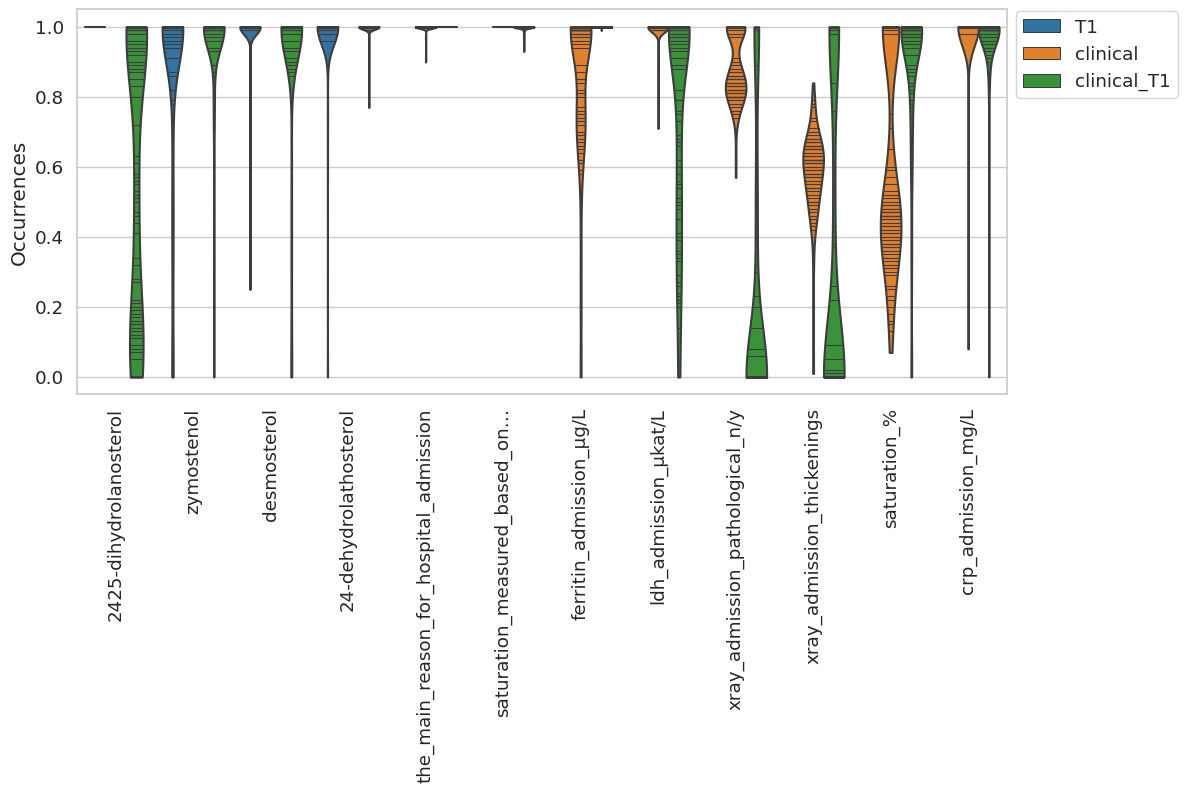

In [8]:

fig, axes = plt.subplots(1, 1, figsize=(12,5))  
df_importances_sf_model = df_fi.drop("model", axis=1)
ax = sns.violinplot(data=df_importances_sf_model, inner="stick", ax=axes, x="feature", y="importance", hue="varSet", cut=0, scale="width") #color = sns.color_palette("hls", 8)[5]     
ax.set_ylabel("Occurrences")    #axes[index]
#ax.set_title(model)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("")
ax.legend(bbox_to_anchor=(1.0, 1.02))